In [234]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


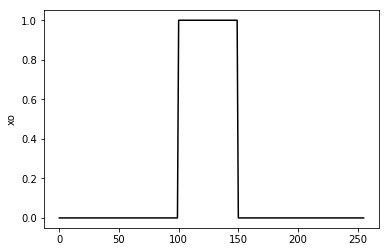

In [244]:
## Generate a sparse signal
xo=np.zeros((256,1))
xo[100:150]=1
plt.plot(xo, 'k')
plt.ylabel('xo')

In [237]:
## Parameters
N=len(x_0)
#m=round(n / 3)
#M=round(n / 2)
M=round( 2 * N / 3)
#m=n

(171, 256)


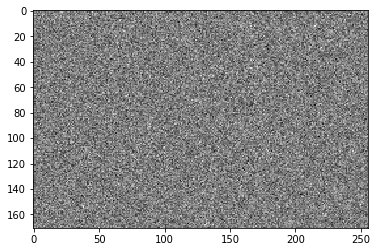

In [238]:
## Generate Gaussian Measurement Matrix
A=np.random.randn(M,N) / np.sqrt(M)
#for j in range(0,n):
#    A[:,j]=phi[:,j] / np.sqrt(sum(abs(phi[:,j]) ** 2))
print(A.shape)
plt.imshow(A, cmap=plt.get_cmap('gray'), aspect='auto', interpolation='none')

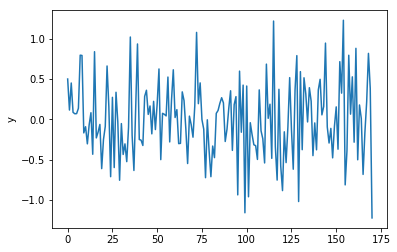

In [239]:
# measurement
y = np.dot(A,xo)
plt.plot(y);plt.ylabel('y')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


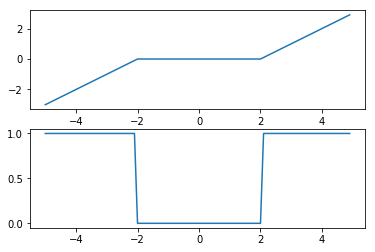

In [240]:
# plot threshold function
from Algorithms.AMP import eta
from Algorithms.AMP import dEta

%load_ext autoreload
%autoreload 2

t = [x / 10.0 for x in range(-50, 50)]

th = eta(t,2)
dTh = dEta(t,2)

plt.subplot(211)
plt.plot(t,th)
plt.subplot(212)
plt.plot(t,dTh)


In [241]:
from Algorithms.AMP import AMP

%load_ext autoreload
%autoreload 2
# https://stackoverflow.com/questions/4111640/how-to-reimport-module-to-python-then-code-be-changed-after-import
    

#lamb = 1.1323  # for M/N = 1/3
#lamb = 0.8769 # for M/N = 1/2
lamb = 0.6573 # for M/N = 2/3
iters=50
xHat,zt,sigs, MSE=AMP(y, A, A.T, lamb, iters, xo=xo);


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[0.00018238]
[0.0002061]


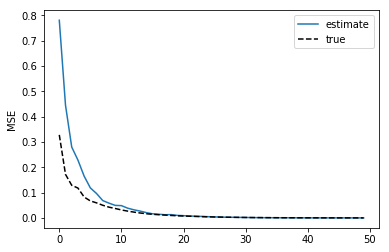

In [242]:
plt.plot(np.array(sigs)**2)
plt.plot(MSE,'k--')
plt.ylabel('MSE')
print(sigs[-1]**2)
print(MSE[-1])
plt.legend(['estimate','true'])

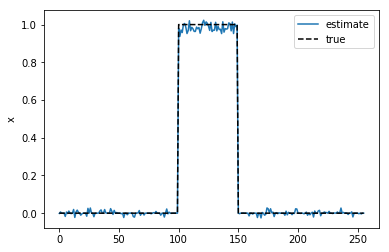

In [243]:
plt.plot(xHat)
plt.plot(xo,'k--')
plt.legend(['estimate','true'])
plt.ylabel('x')